In [130]:
import pandas as pd
import matplotlib.pyplot as plt


In [131]:
df = pd.read_csv("C:/data/BBC/News_dataset.csv", sep=';')

In [132]:
df.shape

(2225, 4)

In [133]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business


In [134]:
df['Content'].head()

0    Ad sales boost Time Warner profit\r\n\r\nQuart...
1    Dollar gains on Greenspan speech\r\n\r\nThe do...
2    Yukos unit buyer faces loan claim\r\n\r\nThe o...
3    High fuel prices hit BA's profits\r\n\r\nBriti...
4    Pernod takeover talk lifts Domecq\r\n\r\nShare...
Name: Content, dtype: object

In [135]:
df.loc[1, 'Content']

'Dollar gains on Greenspan speech\r\n\r\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\r\n\r\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of cond

{'entertainment': 386, 'sport': 511, 'politics': 417, 'business': 510, 'tech': 401}


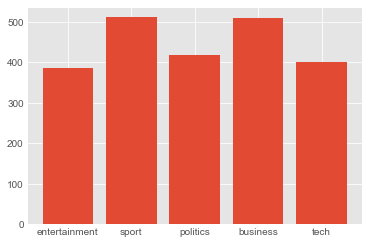

In [136]:
import matplotlib.pyplot as plt

cat = list(df['Category'])
cat2 = set(cat)
dict1 = {}
for value in cat2:
    dict1[value] = cat.count(value)
    
print (dict1)
plt.bar(range(len(dict1)), dict1.values(), align='center')
plt.xticks(range(len(dict1)), list(dict1.keys()))

plt.show()

In [138]:
#length of each news article

df['News_length'] = df['Content'].str.len()

In [139]:
# have a look at top 6
df['News_length'].head()

0    2569
1    2257
2    1557
3    2421
4    1575
Name: News_length, dtype: int64

In [140]:
#get basic stats on column
df['News_length'].describe()


count     2225.000000
mean      2274.363596
std       1370.782663
min        506.000000
25%       1454.000000
50%       1978.000000
75%       2814.000000
max      25596.000000
Name: News_length, dtype: float64

In [141]:
#how many articles with more than 10k words
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

7

In [142]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

In [143]:
df_95.head()

,File_Name,Content,Category,Complete_Filename,News_length
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business,2569
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business,2257
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business,1557
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business,2421
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business,1575


In [144]:
df_95_2 = df_95[['Category', 'News_length']]
df_95_2.head()

,Category,News_length
0,business,2569
1,business,2257
2,business,1557
3,business,2421
4,business,1575


In [145]:
cat2

{'business', 'entertainment', 'politics', 'sport', 'tech'}

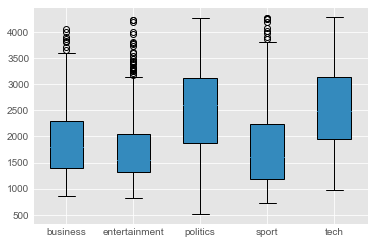

In [146]:
import matplotlib.pyplot as plt

dictc = {}

for value in cat2:
     
     news_len = df_95_2[df_95_2['Category'] == value]
     news_len = list (news_len['News_length'])
     dictc[value]= news_len

        
dictc['business'][0:6]


box_plot_data=[dictc['business'],dictc['entertainment'],dictc['politics'],dictc['sport'], dictc['tech']]
plt.boxplot(box_plot_data,patch_artist=True,labels=['business', 'entertainment','politics','sport','tech'])
plt.show()



In [147]:

#get all data from category and ut in list
cat = list(df['Category'])

#get all  unique values
cat2 = set(cat)

#add counts to dictionary
dict1 = {}
for value in cat2:
    dict1[value] = cat.count(value)
    
print (dict1)

{'entertainment': 386, 'sport': 511, 'politics': 417, 'business': 510, 'tech': 401}


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random
import nltk
from nltk.stem import WordNetLemmatizer 
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import os
os.chdir("C:/IR Course/Adv -IR/")
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
plt.style.use('ggplot')


def set_tokens_to_lowercase(data):
    for index, entry in enumerate(data):
        data[index] = entry.lower()
    return data


def remove_punctuation(data):
    symbols = ",.!"
    for index, entry in enumerate(symbols):
        for index2, entry2 in enumerate (data):
            data[index2] = re.sub(r'[^\w]', ' ', entry2)
    return data

def remove_stopwords_from_tokens(data):
       stop_words = set(stopwords.words("english"))
       new_list = []
       for index, entry in enumerate(data):
           no_stopwords = ""
           entry = entry.split()
           for word in entry:
               if word not in stop_words:
                    no_stopwords = no_stopwords + " " + word 
           new_list.append(no_stopwords)
       return new_list

def lemmatiser (pdf, pcol):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_text_list = []
    
   
    
    for row in range(len(pdf)):
        
        
        # Create an empty list containing lemmatized words
        lemmatized_list = []
        
        # Save the text and its words into an object
        text = pdf.loc[row, pcol]
        #print(text)
       
        text_words = text.split(" ")
    
        # Iterate through every word to lemmatize
        for word in text_words:
            lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
            
        # Join the list
        lemmatized_text = " ".join(lemmatized_list)
        
        # Append to the list containing the texts
        lemmatized_text_list.append(lemmatized_text)
    return lemmatized_text_list


In [149]:

# \r and \n
df['Content_Parsed_1'] = df['Content'].str.replace("\r", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")
# Lowercasing the text
df['Content_Parsed_2'] = df['Content_Parsed_1'].str.lower()
# remove punctuation
df['Content_Parsed_3'] = pd.Series(remove_punctuation (list(df['Content_Parsed_2'])))
#remove possessive
df['Content_Parsed_4'] = df['Content_Parsed_3'].str.replace("'s", "")
df.head()

,File_Name,Content,Category,Complete_Filename,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business,2569,Ad sales boost Time Warner profit Quarterly...,ad sales boost time warner profit quarterly...,ad sales boost time warner profit quarterly...,ad sales boost time warner profit quarterly...
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business,2257,Dollar gains on Greenspan speech The dollar...,dollar gains on greenspan speech the dollar...,dollar gains on greenspan speech the dollar...,dollar gains on greenspan speech the dollar...
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business,1557,Yukos unit buyer faces loan claim The owner...,yukos unit buyer faces loan claim the owner...,yukos unit buyer faces loan claim the owner...,yukos unit buyer faces loan claim the owner...
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business,2421,High fuel prices hit BA's profits British A...,high fuel prices hit ba's profits british a...,high fuel prices hit ba s profits british a...,high fuel prices hit ba s profits british a...
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business,1575,Pernod takeover talk lifts Domecq Shares in...,pernod takeover talk lifts domecq shares in...,pernod takeover talk lifts domecq shares in...,pernod takeover talk lifts domecq shares in...


In [150]:
#lemmatise
df['Content_Parsed_5'] = lemmatiser (df, 'Content_Parsed_4')

df['Content_Parsed_6'] = df['Content_Parsed_5']

#remove stopwords
df['Content_Parsed_6'] = pd.Series(remove_stopwords_from_tokens(list(df['Content_Parsed_6'])))

list_columns = ["File_Name", "Category", "Complete_Filename", "Content", "Content_Parsed_6"]
df = df[list_columns]

df = df.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

print(df.loc[3,'Content_Parsed'])

 high fuel price hit ba profit british airways blame high fuel price 40 drop profit report result three months 31 december 2004 airline make pre tax profit â 75m 141m compare â 125m year earlier rod eddington ba chief executive say result respectable third quarter fuel cost rise â 106m 47 3 ba profit still better market expectation â 59m expect rise full year revenues help offset increase price aviation fuel ba last year introduce fuel surcharge passengers october increase â 6 â 10 one way long haul flight short haul surcharge raise â 2 50 â 4 leg yet aviation analyst mike powell dresdner kleinwort wasserstein say ba estimate annual surcharge revenues â 160m still way short additional fuel cost predict extra â 250m turnover quarter 4 3 â 1 97bn benefit rise cargo revenue look ahead full year result march 2005 ba warn yield average revenues per passenger expect decline continue lower price face competition low cost carriers however say sales would better previously forecast year march 2

In [151]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed
0,001.txt,business,001.txt-business,Ad sales boost Time Warner profit\r\n\r\nQuart...,ad sales boost time warner profit quarterly p...
1,002.txt,business,002.txt-business,Dollar gains on Greenspan speech\r\n\r\nThe do...,dollar gain greenspan speech dollar hit highe...
2,003.txt,business,003.txt-business,Yukos unit buyer faces loan claim\r\n\r\nThe o...,yukos unit buyer face loan claim owners embat...
3,004.txt,business,004.txt-business,High fuel prices hit BA's profits\r\n\r\nBriti...,high fuel price hit ba profit british airways...
4,005.txt,business,005.txt-business,Pernod takeover talk lifts Domecq\r\n\r\nShare...,pernod takeover talk lift domecq share uk dri...


In [152]:

category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

# Category mapping
df['Category_Code'] = df['Category']
df = df.replace({'Category_Code':category_codes})


## ensure no other category in dataframe

for index, row in df.iterrows():
    if row['Category_Code'] not in [0,1,2,3,4]:
         df = df.drop (index)

df.tail()

,File_Name,Category,Complete_Filename,Content,Content_Parsed,Category_Code
2220,397.txt,tech,397.txt-tech,BT program to beat dialler scams\r\n\r\nBT is ...,bt program beat dialler scam bt introduce two...,4
2221,398.txt,tech,398.txt-tech,Spam e-mails tempt net shoppers\r\n\r\nCompute...,spam e mail tempt net shoppers computer users...,4
2222,399.txt,tech,399.txt-tech,Be careful how you code\r\n\r\nA new European ...,careful code new european directive could put...,4
2223,400.txt,tech,400.txt-tech,US cyber security chief resigns\r\n\r\nThe man...,us cyber security chief resign man make sure ...,4
2224,401.txt,tech,401.txt-tech,Losing yourself in online gaming\r\n\r\nOnline...,lose online game online role play game time c...,4


In [153]:
X_train, X_test, y_train, y_test = train_test_split(df['Content_Parsed'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)
 

In [154]:

# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [155]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
                        
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
labels_train = np.array(labels_train, dtype=np.int)

#training data
print(features_train.shape)

(1891, 300)


In [156]:
labels_train

array([4, 2, 0, ..., 4, 3, 0])

In [157]:
features_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.09820761,  0.11885154, ...,  0.06041294,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.09226262,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.11413388,
         0.12866362,  0.        ]])

In [158]:
#test data

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
labels_test = np.array(labels_test, dtype=np.int)


#test data
print(features_test.shape)

(334, 300)


In [159]:
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'business' category:
  . Most correlated unigrams:
. firm
. market
. economy
. growth
. bank
  . Most correlated bigrams:
. last year
. year old

# 'entertainment' category:
  . Most correlated unigrams:
. tv
. music
. star
. award
. film
  . Most correlated bigrams:
. mr blair
. prime minister

# 'politics' category:
  . Most correlated unigrams:
. minister
. blair
. election
. party
. labour
  . Most correlated bigrams:
. prime minister
. mr blair

# 'sport' category:
  . Most correlated unigrams:
. win
. side
. game
. team
. match
  . Most correlated bigrams:
. say mr
. year old

# 'tech' category:
  . Most correlated unigrams:
. digital
. technology
. computer
. software
. users
  . Most correlated bigrams:
. year old
. say mr



In [160]:
svc_0= svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=8, shrinking=True, tol=0.001,
  verbose=False)


print('Parameters currently in use:\n')
print(svc_0.get_params())

Parameters currently in use:

{'C': 0.1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [161]:

svc_0.fit(features_train, labels_train)
svc_pred = svc_0.predict(features_test)

In [162]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, svc_0.predict(features_train)))


The training accuracy is: 
0.960338445267


In [163]:
print("Classification report")
print(classification_report(labels_test,svc_pred))


Classification report
             precision    recall  f1-score   support

          0       0.87      0.98      0.92        81
          1       0.96      0.96      0.96        49
          2       0.97      0.88      0.92        72
          3       0.99      0.99      0.99        72
          4       0.93      0.88      0.91        60

avg / total       0.94      0.94      0.94       334

